In [1]:
import pandas as pd
import pm4py
from pm4py.visualization.petri_net import visualizer

In [2]:
df = pd.read_csv("../data/Q6-theory.csv", sep=",")
df.rename(columns={
    "Timestamp": "time:timestamp",
    "CaseID": "case:concept:name",
    "Event": "concept:name",
    "FileName": "org:resource",
}, inplace=True)
df.head()

,case:concept:name,time:timestamp,concept:name,org:resource
0,1,1,File.Open,RoomService.kt
1,1,2,File.Read,RoomService.kt
2,1,3,File.Write,RoomService.kt
3,2,4,File.Open,WebsocketService.kt
4,2,5,File.Read,WebsocketService.kt


In [3]:
log = pm4py.convert_to_event_log(df[:])
net, im, fm = pm4py.discover_petri_net_alpha(log)

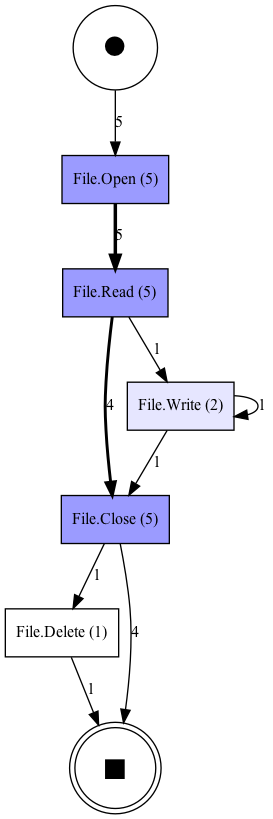

In [4]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

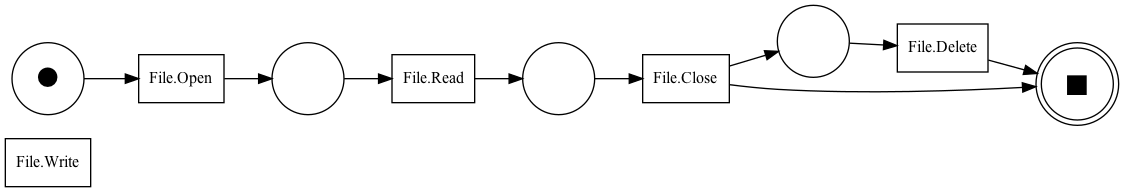

In [5]:
gviz = visualizer.apply(net, im, fm)
visualizer.view(gviz)